# Activity: Build a Naive Bayes model 

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [1]:
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players.csv')

### Display the data

Review the first 10 rows of data.

In [3]:
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [5]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.
X = extracted_data.drop(['target_5yrs'], axis=1)

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [10]:
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [13]:
y.value_counts(normalize=True)

1    0.620149
0    0.379851
Name: target_5yrs, dtype: float64

**Question:** What do you observe about the your target variable?


The target varaibles are binary(0 or 1) and it is pretty much balance with 60 to 40 ratio.

In [14]:
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


**Question:** What do you observe about the your predictor variables?

Values in each column are varied. Some columns have values in hundreds and some columns only have values less than 1.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [15]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, stratify=y)

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [18]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


**Question:** How many rows are in each of the outputs?


Train has 1005 and test has 335 rows.

**Question:** What was the effect of the train-test split?


It splits a data into train and test set with selected size(=0.75 for train)

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data.

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [21]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = nb.predict(X_test)



## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [28]:
# Print your accuracy score.
print(f"Accuracy Score : {metrics.accuracy_score(y_test, y_pred):.3f}")
# Print your precision score.
print(f"Precision Score: {metrics.precision_score(y_test, y_pred):.3f}")
# Print your recall score.
print(f"Recall Score   : {metrics.recall_score(y_test, y_pred):.3f}")
# Print your f1 score.
print(f"F1 Score       : {metrics.f1_score(y_test, y_pred):.3f}")

Accuracy Score : 0.681
Precision Score: 0.839
Recall Score   : 0.601
F1 Score       : 0.700


**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



Accuracy is 0.681 saying it is 68.1% accurate to predict the overall.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


Accuracy is useful wehn evaluating overall perform but not the best evaluation metrics when the misclassification costs for a class become severe.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


Precision is 0.839 and Recall is 0.601 showing that the model performe better in Precision than Recall by correctly predicting positives well while balancing false positives meaning that player will play longer than five years. The recall score of 0.601 shows that it is not good at predicting true negatives meaning the player will not play for five years or more.

**Question:** What is the F1 score of your model, and what does this score mean?

The F1 score is balanced version between Precision and Recall. The recall score of 0.700 showed that reasonable predictive power in the model.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

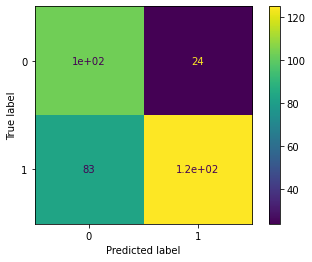

In [30]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.
disp.plot()


**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


The Top left(light green) and Bottom right(yellow) indicate the correctly predicted ones. The Top right(purple) indicates the False Positive that influence the Precision and the Bottom left(dark green) dinciates the False Negative that influence the Recall. It shows that greater value of False Negative than of False Positive lead to worse performance with Recall Score.